In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error,log_loss
from tqdm import tqdm_notebook 

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

#Generate Data

In [0]:
np.random.seed(0)

In [4]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


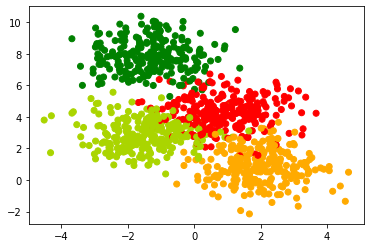

In [5]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [0]:
labels_orig = labels
labels = np.mod(labels_orig, 2)

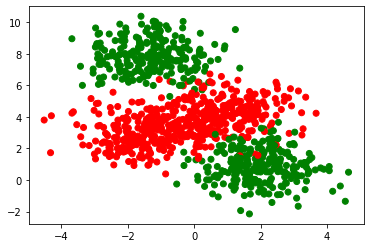

In [7]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [8]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


#Different Optimisation Algorithms

In [0]:
W1 = np.random.randn(2,2)
W2 = np.random.randn(2,1)

In [0]:
class FirstFFNetworkVec:
  
  def __init__(self):
    self.W1 = W1.copy() # (2,2)
    self.W2 = W2.copy() # (2,1)
    self.B1 = np.zeros((1,2))
    self.B2 = np.zeros((1,1))

  def __init__(self, W1, W2):
        
    self.params={}
    self.params["W1"]=W1.copy()
    self.params["W2"]=W2.copy()
    self.params["B1"]=np.zeros((1,2))
    self.params["B2"]=np.zeros((1,1))
    self.num_layers=2
    self.gradients={}
    self.update_params={}
    self.prev_update_params={}
    for i in range(1,self.num_layers+1):
      self.update_params["v_w"+str(i)]=0
      self.update_params["v_b"+str(i)]=0
      self.update_params["m_b"+str(i)]=0
      self.update_params["m_w"+str(i)]=0
      self.prev_update_params["v_w"+str(i)]=0
      self.prev_update_params["v_b"+str(i)]=0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    x = x.reshape(1,-1) # (1,2)
    self.A1 = np.matmul(x,self.W1) + self.B1 # (1,2) * (2,2) + (1,2) -> (1,2)
    self.H1 = self.sigmoid(self.A1) # (1,2)
    #print("in fwd pass :",self.H1.shape,self.W1.shape,self.B2.shape)
    self.A2 = np.matmul(self.H1,self.W2) + self.B2 # (1,2) * (2,1) + (1,1) -> (1,1)
    #print("in fwd pass :",self.A2.shape)
    self.H2 = self.sigmoid(self.A2) # (1,1)
    #print("shape of H2 is :",self.H2.shape)
    return self.H2[0]

  def grad_sigmoid(self,x):
    return x*(1-x)
  
  def grad(self, x, y):
    self.forward_pass(x)
    x = x.reshape(1,-1)
    y = y.reshape(1,-1)
    
    #print("shapeee #:",self.H2.shape,y.shape,self.grad_sigmoid(self.H2).shape)
    self.dA2 = np.multiply((self.H2 - y), self.grad_sigmoid(self.H2)) # (1,1) .* (1,1) -> (1,1)

    self.dW2 = np.matmul(self.H1.T, self.dA2) # (2,1) * (1,1) -> (2,1)
    self.dB2 = self.dA2 # (1,1)
    #print("shapeee : ",self.dA2.shape,self.W2.T.shape)
    self.dH1 = np.matmul(self.dA2, self.W2.T) # (1,1) * (1,2) -> (1,2)
    self.dA1 = np.multiply(self.dH1, self.grad_sigmoid(self.H1)) # (1,2) .* (1,2) -> (1,2)

    self.dW1 = np.matmul(x.T, self.dA1) # (2,1) * (1,2) -> (2,2)
    self.dB1 = self.dA1 # (1,2)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False):
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):

      dW1 = np.zeros((2,2))
      dW2 = np.zeros((2,1))
      dB1 = np.zeros((1,2))
      dB2 = np.zeros((1,1))
      for x, y in zip(X, Y):
        self.grad(x, y)
        dW1 += self.dW1
        dW2 += self.dW2
        dB1 += self.dB1
        dB2 += self.dB2

      m = X.shape[0]
      self.W2 -= learning_rate * (dW2 / m)
      self.B2 -= learning_rate * (dB2 / m)
      self.W1 -= learning_rate * (dW1 / m)
      self.B1 -= learning_rate * (dB1 / m) 
      
      if display_loss:
        Y_pred = self.predict(X)
        Y_pred=Y_pred.reshape(-1,1)
        #print("shapee :",Y_pred.shape,X.shape,Y.shape)
        
        Y = Y.reshape(-1,1)
        loss[i] =mean_squared_error(Y, Y_pred)

      
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


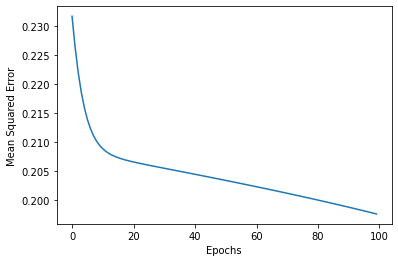

In [15]:
ffn = FirstFFNetworkVec()
ffn.fit(X_train, Y_train, epochs=100, learning_rate=.8, display_loss=True)

In [16]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.69
Validation accuracy 0.67


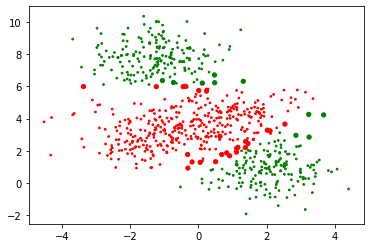

In [14]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()